## Lib

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
import numpy
import os

## Poland

In [2]:
#i = 0
country = "Poland"
res = requests.get('https://www.worldometers.info/coronavirus/country/' + country).text
file_name = 'data_file_poland.json'


### Variables

In [3]:
cases_str = "Cases"
deaths_str = "Deaths"
recovered_str = "Recovered"
date_str = "Date"
new_cases_str = "New cases"
active_cases_str = "Active cases"
total_recovered_cases_str = "Total recovered cases"


### Methods

In [4]:
def load_and_save(cases_dic):
  try:
    data = json.load(open(file_name))
  except:
    data = []
  data.append(cases_dic)

  with open(file_name, "w") as file:
    json.dump(data, file, indent=2, ensure_ascii=False)
    

def get_case(cases,deaths,recovered,active_cases,total_recovered_cases,date):
  day = {
    cases_str: cases,
    deaths_str: deaths,
    recovered_str: recovered,
    active_cases_str: active_cases,
    total_recovered_cases_str: total_recovered_cases,
    date_str: str(date),
  }
  return day

def get_diff_dic(date, diff):
  new = {
     new_cases_str: diff,
     date_str: date
  }
  return new

def delete_data_file():
    if os.path.exists(file_name):
        os.remove(file_name)
    else:
        print("The file does not exist")
    
    
def load_data():
    data = json.load(open(file_name))
    return data

def get_days():
    data = load_data()
    
    return "Number of days of epidemic duration: " + str(len(data))

def load_total_cases():
    soup = BeautifulSoup(res, "html.parser")
    all_scripts = soup.find_all('script')
    script_total_cases = all_scripts[23].text
    script_active_cases = all_scripts[25].text
    script_recovered_cases = all_scripts[28].text
    script_dead_cases = all_scripts[26].text
    #print(script)
    data = script_total_cases.split('data: [', 1)[1].split(']', 1)[0]
    data = '[' + data + ']'
    data = json.loads(data)
    
    dataA = script_active_cases.split('data: [', 1)[1].split(']', 1)[0]
    dataA = '[' + dataA + ']'
    dataA = json.loads(dataA)
    
    dataR = script_recovered_cases.split('data: [', 1)[1].split(']', 1)[0]
    dataR = '[' + dataR + ']'
    dataR = json.loads(dataR)
    
    dataD = script_dead_cases.split('data: [', 1)[1].split(']', 1)[0]
    dataD = '[' + dataD + ']'
    dataD = json.loads(dataD)
    
    dataC = script_total_cases.split('categories: [', 1)[1].split(']', 1)[0]
    dataC = '[' + dataC + ']'
    dataC = json.loads(dataC)
    
    dataTR = calculate_recovered_cases(dataR)
    
    for i in range(len(data)):
        load_and_save(get_case(data[i], dataD[i], dataR[i],dataA[i],dataTR[i], dataC[i]))


def calculate_recovered_cases(dataR):
    data = []
    sum = 0
    for i in range(len(dataR)):
        sum += dataR[i]
        data.append(sum)
        
    return data
        
def n_max():
    data = load_data()
    new_cases = new_cases_calculation()
    result_new_cases = 0
    result_date = ""
    for i in range(len(data)-1):
        date_dic = data[i]
        date = date_dic["Date"]
        new_cases_dic = new_cases[i]
        new_cases_num = new_cases_dic["New cases"]
        if result_new_cases <= new_cases_num:
            result_date = date
            result_new_cases = new_cases_num
            
    return "nmax - day with the maximum number of patients \n" + "Date: " + str(result_date) + "\nNew cases: " + str(result_new_cases)
        
def load_active_cases():
    soup = BeautifulSoup(res, "html.parser")
    all_scripts = soup.find_all('script')
    
    data = script.split('data: [', 1)[1].split(']', 1)[0]
    data = '[' + data + ']'
    data = json.loads(data)
    return data

def f_max():
    data = load_data()
    result_cases = 0
    result_date = ""
    for i in range(len(data)):
        data_dic = data[i]
        date_dic = data[i]
        active_cases = data_dic['Active cases']
        date = date_dic['Date']
        if result_cases <= active_cases:
            result_cases = active_cases
            result_date = date
            
    return "fmax - maximum number of patients \n" + "Date: " + str(result_date) + "\nMax of active cases: " + str(result_cases)
    
    

def new_cases_calculation():
    dataT = load_data()
    #result = 0
    new_cases_arr = []
    for i in range(len(dataT)- 1) :
        first_dic = dataT[i]
        seccond_dic = dataT[i+1]
        diff = (int(first_dic['Cases']) - int(seccond_dic['Cases'])) * -1
        if i == 0:
            new_cases_arr.append(get_diff_dic(first_dic['Date'],diff))
        else: 
            new_cases_arr.append(get_diff_dic(seccond_dic['Date'],diff))
    return new_cases_arr
    

def show_total_cases_graph():
    data = load_data()
    days = len(data)

    x = []
    y = []
    x_str = []
    for i in range(len(data)):
        test = data[i]
        x.append(int(i))
        y.append(int(test[cases_str]))
        x_str.append(str(test[date_str]))


    slope, intercept, r, p, std_err = stats.linregress(x, y)

    def myfunc(x):
      return slope * x + intercept

    mymodel = numpy.poly1d(numpy.polyfit(x, y, 5))
    myline = numpy.linspace(0, days, 100)
    prediction_total_cases = mymodel(days+1)


    print("Days: ", days)
    print("R: ", r2_score(y, mymodel(x)))
    print("Prediction for ", days+1, " day is: ", int(round(prediction_total_cases, 0)), " cases")

    plt.figure(figsize=(20,10))
    plt.scatter(x_str, y, color='blue')
    plt.xticks(rotation=75,fontsize = 15)
    plt.plot(myline, mymodel(myline), color='red')
    plt.show()
    


### Delete data_file for poland

In [5]:
delete_data_file()

### Save data_file from web to file

In [6]:
load_total_cases()

### Show: Nmax, Fmax and N

In [7]:
print(country)
print(n_max())
print(f_max())
print(get_days())

Poland
nmax - day with the maximum number of patients 
Date: Apr 18
New cases: 545
fmax - maximum number of patients 
Date: Apr 21
Max of active cases: 8158
Number of days of epidemic duration: 67


### Show graph, days, R and prediction for next day

Days:  91
R:  0.9879828506527186
Prediction for  92  day is:  72750  cases


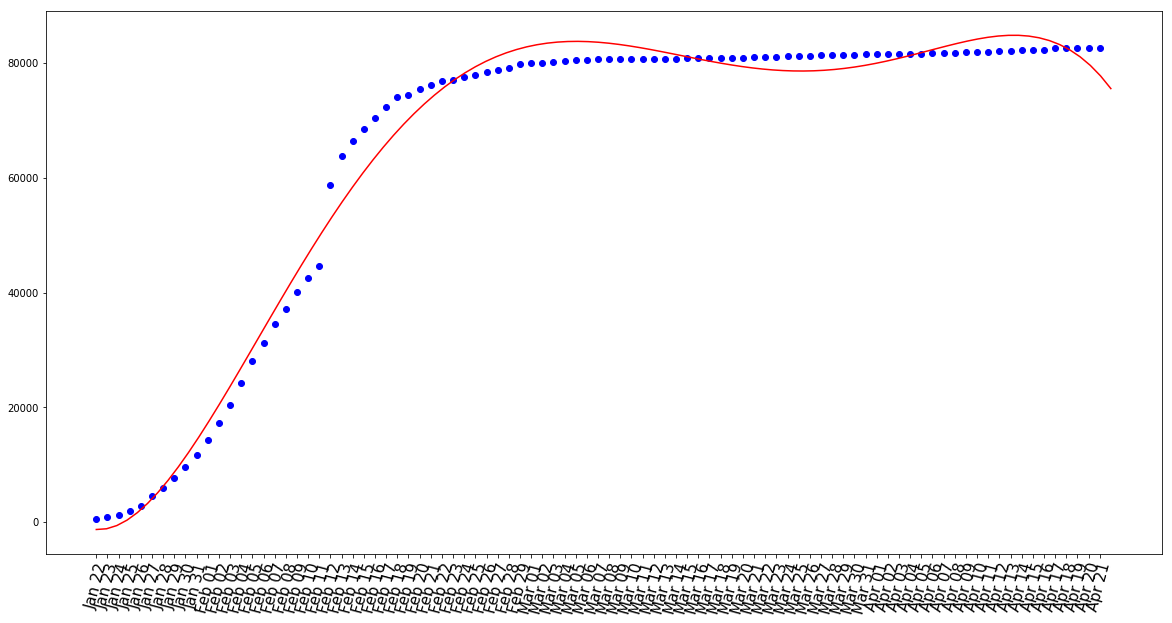

In [14]:
show_total_cases_graph()

## Chine

In [15]:
country = "China"
res = requests.get('https://www.worldometers.info/coronavirus/country/' + country).text
file_name = 'data_file_chine.json'

### Delete data_file for poland

In [16]:
delete_data_file()

### Save data_file from web to file

In [17]:
load_total_cases()

### Show: Nmax, Fmax and N

In [18]:
print(country)
print(n_max())
print(f_max())
print(get_days())

China
nmax - day with the maximum number of patients 
Date: Feb 11
New cases: 14108
fmax - maximum number of patients 
Date: Feb 17
Max of active cases: 58016
Number of days of epidemic duration: 91


### Show graph, days, R and prediction for next day

Days:  91
R:  0.9879828506527186
Prediction for  92  day is:  72750  cases


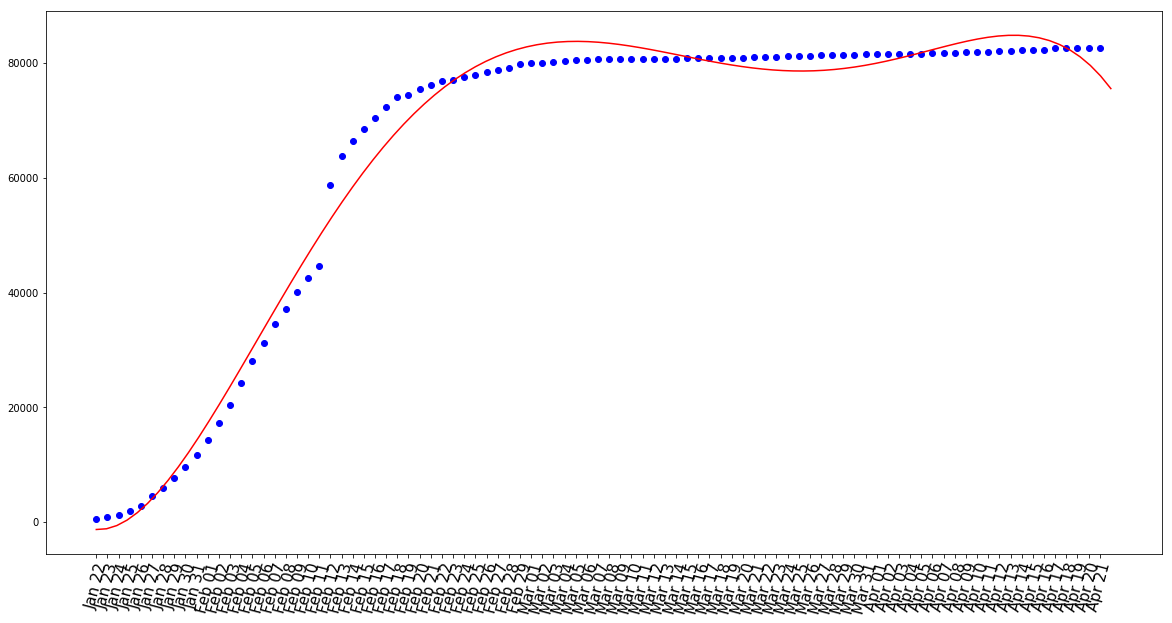

In [19]:
show_total_cases_graph()
